In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from econml.dr import DRLearner
from econml.dml import LinearDML

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = pd.read_csv("data/fixed_data.csv")
data

,AUN_SUM,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,3.0,9.0,1,1,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,5.0,0.0,0,1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,5.0,4.0,1,1,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,3.0,0.0,0,1,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,3.0,3.0,0,1,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,4.0,2.0,1,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,5.0,0.0,0,0,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,4.0,0.0,1,0,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,4.0,1.0,0,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [4]:
data = data.drop(columns=["AUUN_ANY"])
data

,AUN_SUM,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,3.0,9.0,1,1,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,5.0,0.0,0,1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,5.0,4.0,1,1,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,3.0,0.0,0,1,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,3.0,3.0,0,1,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,4.0,2.0,1,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,5.0,0.0,0,0,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,4.0,0.0,1,0,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,4.0,1.0,0,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [5]:
data.to_csv('data/fixed_data.csv', index=False)

In [2]:
df = pd.read_csv("data/merged_data (1).csv")  # 데이터 로드
df

,AUN_SUM,AUUNCOST,AUUNNCOV,AUUNENUF,AUUN_ANY,AUPOPAMT,HEALTH,K6SCMON,PRVHLTIN,GRPHLTIN,...,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,NaN,NaN,NaN,0,NaN,3.0,9.0,1.0,1.0,...,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,NaN,NaN,NaN,0,NaN,5.0,NaN,2.0,2.0,...,0.0,0.0,0.8,0.0,0,0,0.00,NaN,1.0,1.0
2,0.0,NaN,NaN,NaN,0,NaN,5.0,0.0,2.0,2.0,...,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
3,0.0,NaN,NaN,NaN,0,NaN,5.0,4.0,1.0,1.0,...,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
4,0.0,NaN,NaN,NaN,0,NaN,3.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873398,0.0,NaN,NaN,NaN,0,NaN,5.0,NaN,2.0,2.0,...,0.0,0.0,0.8,0.0,0,0,0.00,6.0,1.0,1.0
873399,0.0,NaN,NaN,NaN,0,NaN,5.0,0.0,2.0,2.0,...,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
873400,0.0,NaN,NaN,NaN,0,NaN,4.0,0.0,1.0,1.0,...,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
873401,0.0,NaN,NaN,NaN,0,NaN,4.0,1.0,2.0,2.0,...,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [34]:
df.columns

Index(['AUN_SUM', 'AUUNCOST', 'AUUNNCOV', 'AUUNENUF', 'AUUN_ANY', 'AUPOPAMT',
       'HEALTH', 'K6SCMON', 'PRVHLTIN', 'GRPHLTIN', 'YEAR', 'Treatment',
       'Post', 'QUESTID2', 'AGE2', 'IRSEX', 'INCOME', 'IRMARIT', 'SERVICE',
       'CG30EST', 'AL30EST', 'IRHHSIZ2', 'NOBOOKY2', 'COCFLAG', 'COCYR',
       'EDUCCAT2', 'JBSTATR2', 'TXEVER', 'TXYREVER'],
      dtype='object')

In [43]:
# 필요 없는 변수 제거
data = df.drop(columns=["QUESTID2", "YEAR", "AUUNCOST", "AUUNNCOV", "AUUNENUF", "PRVHLTIN", "GRPHLTIN", "AUPOPAMT"])  # ID 및 YEAR 변수 제거


In [47]:
# 결측치 확인
print(data.isnull().sum())


AUN_SUM      0
AUUN_ANY     0
HEALTH       0
K6SCMON      0
Treatment    0
Post         0
AGE2         0
IRSEX        0
INCOME       0
IRMARIT      0
SERVICE      0
CG30EST      0
AL30EST      0
IRHHSIZ2     0
NOBOOKY2     0
COCFLAG      0
COCYR        0
EDUCCAT2     0
JBSTATR2     0
TXEVER       0
TXYREVER     0
dtype: int64


In [46]:
data = data.dropna()
data

,AUN_SUM,AUUN_ANY,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,...,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,0,3.0,9.0,1,1,0.666667,2,1.000000,4,...,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
2,0.0,0,5.0,0.0,0,1,0.333333,1,0.000000,4,...,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
3,0.0,0,5.0,4.0,1,1,0.333333,2,0.333333,4,...,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
4,0.0,0,3.0,0.0,0,1,0.666667,2,0.000000,1,...,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
5,0.0,0,3.0,3.0,0,1,0.333333,1,0.333333,4,...,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873397,0.0,0,4.0,2.0,1,0,0.333333,1,1.000000,4,...,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
873399,0.0,0,5.0,0.0,0,0,0.333333,2,0.333333,1,...,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
873400,0.0,0,4.0,0.0,1,0,0.666667,2,1.000000,1,...,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
873401,0.0,0,4.0,1.0,0,0,0.333333,1,1.000000,4,...,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [48]:
data = data.reset_index(drop=True)  # 인덱스 초기화
data

,AUN_SUM,AUUN_ANY,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,...,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,0,3.0,9.0,1,1,0.666667,2,1.000000,4,...,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,0,5.0,0.0,0,1,0.333333,1,0.000000,4,...,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,0,5.0,4.0,1,1,0.333333,2,0.333333,4,...,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,0,3.0,0.0,0,1,0.666667,2,0.000000,1,...,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,0,3.0,3.0,0,1,0.333333,1,0.333333,4,...,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,0,4.0,2.0,1,0,0.333333,1,1.000000,4,...,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,0,5.0,0.0,0,0,0.333333,2,0.333333,1,...,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,0,4.0,0.0,1,0,0.666667,2,1.000000,1,...,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,0,4.0,1.0,0,0,0.333333,1,1.000000,4,...,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [51]:
data.to_csv("data/final_1221.csv", index = False)

# Doubly Robust -> Something wrong...

In [4]:
# 결과 변수 목록
numeric_outcomes = ["AUN_SUM", "HEALTH", "K6SCMON"]
categorical_outcomes = ["AUUN_ANY"]

# 데이터셋 분리 (Train/Test Split)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 결과 저장
results = {}

In [5]:
for outcome in numeric_outcomes:
    print(f"Estimating effect for numeric outcome: {outcome}")
    
    # 변수 설정 (Train/Test 분리)
    Y_train = train_data[outcome]
    T_train = train_data["Treatment"]
    X_train = train_data.drop(columns=["Treatment", "Post"] + numeric_outcomes + categorical_outcomes)
    
    Y_test = test_data[outcome]
    T_test = test_data["Treatment"]
    X_test = test_data.drop(columns=["Treatment", "Post"] + numeric_outcomes + categorical_outcomes)

    # Double Machine Learning (LinearDML)
    dml_model = LinearDML(model_y=XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
                          model_t=XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
                          discrete_treatment=True, random_state=42)

    # 학습
    dml_model.fit(Y_train, T_train, X=X_train)

    # ATE 추정
    ate = dml_model.effect(X_test)
    ci_lower, ci_upper = dml_model.effect_interval(X_test, alpha=0.05)

    results[outcome] = {
        "ATE": ate.mean(),
        "CI": (ci_lower.mean(), ci_upper.mean())
    }
    print(f"ATE for {outcome}: {ate.mean()}, CI: ({ci_lower.mean()}, {ci_upper.mean()})\n")


Estimating effect for numeric outcome: AUN_SUM
ATE for AUN_SUM: 0.109015191602253, CI: (0.024053802660205258, 0.19397658054430067)

Estimating effect for numeric outcome: HEALTH
ATE for HEALTH: 0.058053041445424655, CI: (0.03673819826824744, 0.07936788462260187)

Estimating effect for numeric outcome: K6SCMON
ATE for K6SCMON: -0.057004977338421726, CI: (-0.1708478545681841, 0.0568378998913406)



In [17]:
# Outcome 예측 (LinearDML 메서드 사용)
y_pred_train = dml_model.score(Y_train, T_train, X_train)
y_pred_train

21.95002465283724

In [14]:
print(dml_model.model_y)  # Outcome Regression 모델 정보
print(dml_model.model_t)  # Treatment 모델 정보


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, fe

In [18]:
from sklearn.metrics import r2_score

# DML 모델 설정 및 학습
dml_model = LinearDML(
    model_y=XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    model_t=XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    discrete_treatment=True,
    random_state=42
)

# 학습
dml_model.fit(Y_train, T_train, X=X_train)

# 모델 상태 확인
print("Outcome Regression Model:", dml_model.model_y)
print("Treatment Model:", dml_model.model_t)

# Outcome 예측 (LinearDML 메서드 사용)

# R² 계산
r2_train = r2_score(Y_train, y_pred_train)
print(f"Outcome Regression Model R² (Train): {r2_train}")


Outcome Regression Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Treatment Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              ena

InvalidParameterError: The 'y_pred' parameter of r2_score must be an array-like. Got 21.95002465283724 instead.

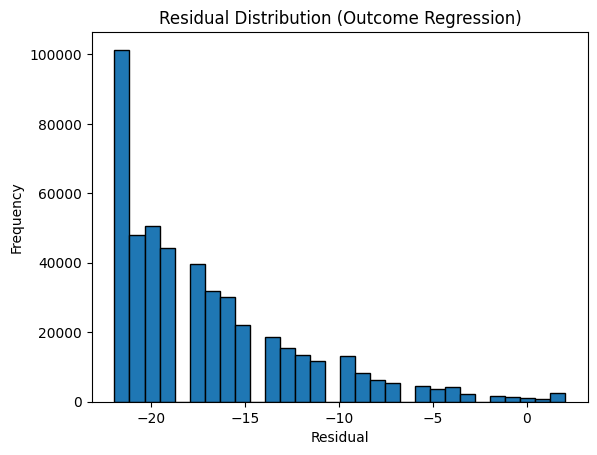

In [20]:
# Outcome Regression 설명력 평가
y_pred_train = dml_model.score(Y_train, T_train, X_train)
# r2_train = r2_score(Y_train, y_pred_train)
# print(f"Outcome Regression Model R² (Train): {r2_train}")

# 잔차 분석
residuals = Y_train - y_pred_train
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residual Distribution (Outcome Regression)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Treatment 모델 설명력 평가 (Propensity Score)
# propensity_scores = dml_model.model_t.predict_proba(X_train)[:, 1]  # 처치 확률 예측
# auc_score = roc_auc_score(T_train, propensity_scores)
# print(f"Treatment Model AUC-ROC: {auc_score}")

In [ ]:
# 1. Propensity Score 추정 결과 확인
# 처치 여부(Treatment)를 예측하는 모델의 성능을 확인.
# AUC 값이 0.5에 가까우면 처치 여부를 예측하기 어렵고, 이는 공변량의 분포가 잘 섞였음을 의미.
# AUC 값이 0.9 이상이면 과적합 가능성.
from sklearn.metrics import roc_auc_score

# Propensity Score 예측
propensity_scores = propensity_model.predict_proba(X_train)[:, 1]  # 확률값 추출

# AUC-ROC 계산
auc = roc_auc_score(T_train, propensity_scores)
print(f"Propensity Score Model AUC: {auc}")


In [65]:
# 1-1.공변량 균형 확인 (SMD - Standardized Mean Differences)

import numpy as np
import pandas as pd

def calculate_smd(X, T):
    """
    Calculate Standardized Mean Differences (SMD) for each covariate.

    Parameters:
    - X: DataFrame of covariates
    - T: Series of treatment indicators (binary: 0 or 1)

    Returns:
    - smd_df: DataFrame containing SMD for each covariate
    """
    treated = X[T == 1]
    control = X[T == 0]

    smd = {}
    for col in X.columns:
        mean_treated = treated[col].mean()
        mean_control = control[col].mean()
        std_pooled = np.sqrt(
            (treated[col].var() + control[col].var()) / 2
        )
        smd[col] = np.abs(mean_treated - mean_control) / std_pooled

    smd_df = pd.DataFrame.from_dict(smd, orient="index", columns=["SMD"]).sort_values(by="SMD", ascending=False)
    return smd_df

# 공변량과 처리 변수
X_train = train_data.drop(columns=["Treatment", "Post"] + numeric_outcomes + categorical_outcomes)
T_train = train_data["Treatment"]

# SMD 계산
smd_df = calculate_smd(X_train, T_train)

# SMD 결과 출력
print(smd_df)


               SMD
INCOME    0.891965
EDUCCAT2  0.662658
JBSTATR2  0.532157
IRMARIT   0.333813
NOBOOKY2  0.184692
TXEVER    0.140391
TXYREVER  0.122024
IRHHSIZ2  0.095040
COCYR     0.066497
COCFLAG   0.064332
IRSEX     0.041089
AGE2      0.040954
CG30EST   0.035302
SERVICE   0.023775
AL30EST   0.009729


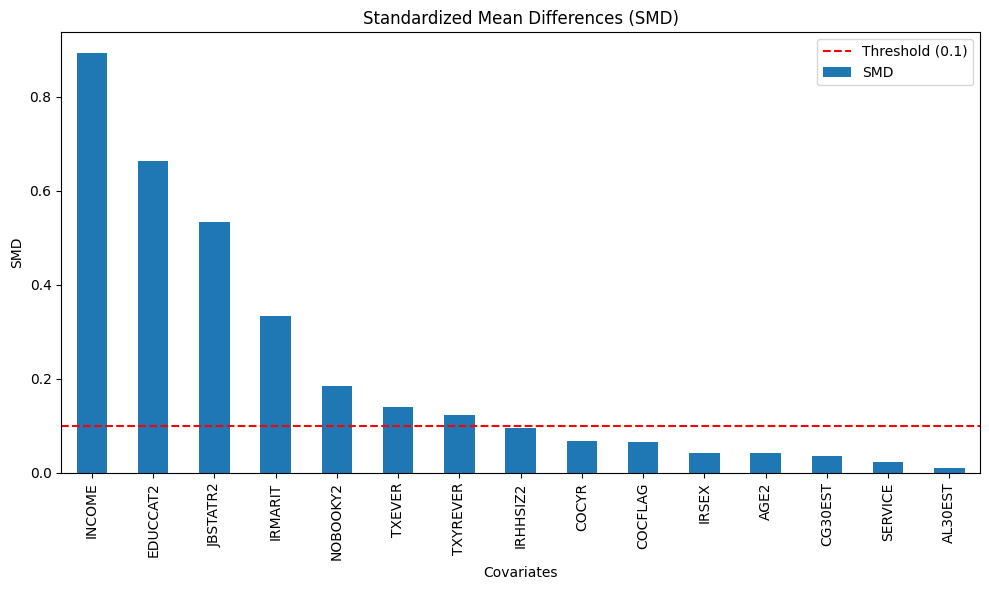

In [66]:
import matplotlib.pyplot as plt

# SMD 막대 그래프
smd_df.plot(kind="bar", figsize=(10, 6), legend=False)
plt.axhline(0.1, color="red", linestyle="--", label="Threshold (0.1)")
plt.title("Standardized Mean Differences (SMD)")
plt.ylabel("SMD")
plt.xlabel("Covariates")
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
X_train

,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
309144,1.000000,1,0.333333,1,2.0,0.0,0.0,0.2,0.0,0,0,0.25,7.0,1.0,1.0
547495,0.333333,2,0.000000,4,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
270814,0.666667,1,0.666667,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,0.0,1.0,1.0
591725,0.333333,2,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.25,1.0,1.0,1.0
552324,0.333333,2,1.000000,1,2.0,0.0,0.0,0.6,0.0,0,0,0.75,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.75,5.0,1.0,1.0
259178,0.666667,1,1.000000,1,2.0,0.0,0.0,0.6,0.0,0,0,1.00,0.0,1.0,1.0
365838,0.333333,1,1.000000,4,2.0,0.0,0.0,0.6,0.0,0,0,0.50,1.0,1.0,1.0
131932,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,1.00,2.0,1.0,1.0


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# 공변량 전처리 함수
def preprocess_covariates(data):
    # 범주형 변수 및 연속형 변수 구분
    categorical_vars = data.select_dtypes(include=['int64']).columns
    numeric_vars = data.select_dtypes(include=['float64']).columns

    # 결측치 처리 (숫자형 변수)
#     imputer = SimpleImputer(strategy='mean')
#     data[numeric_vars] = imputer.fit_transform(data[numeric_vars])

    # 범주형 변수 One-Hot Encoding
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_categorical = pd.DataFrame(
        encoder.fit_transform(data[categorical_vars]),
        columns=encoder.get_feature_names_out(categorical_vars),
        index=data.index
    )

    # 숫자형 변수와 결합
    processed_data = pd.concat([data[numeric_vars], encoded_categorical], axis=1)
    return processed_data

# 공변량 데이터 전처리
X_train_processed = preprocess_covariates(X_train)
X_test_processed = preprocess_covariates(X_test)

# 전처리된 데이터 확인
print("Processed X_train sample:")
print(X_train_processed.head())


Processed X_train sample:
            AGE2    INCOME  SERVICE  CG30EST  AL30EST  IRHHSIZ2  NOBOOKY2  \
309144  1.000000  0.333333      2.0      0.0      0.0       0.2       0.0   
547495  0.333333  0.000000      2.0      0.0      0.0       0.6       0.0   
270814  0.666667  0.666667      2.0      0.0      0.0       0.6       0.0   
591725  0.333333  1.000000      2.0      0.0      0.0       0.4       0.0   
552324  0.333333  1.000000      2.0      0.0      0.0       0.6       0.0   

        EDUCCAT2  JBSTATR2  TXEVER  ...  IRSEX_1  IRSEX_2  IRMARIT_1  \
309144      0.25       7.0     1.0  ...      1.0      0.0        1.0   
547495      0.50       8.0     1.0  ...      0.0      1.0        0.0   
270814      0.50       0.0     1.0  ...      1.0      0.0        1.0   
591725      0.25       1.0     1.0  ...      0.0      1.0        0.0   
552324      0.75       0.0     1.0  ...      0.0      1.0        1.0   

        IRMARIT_2  IRMARIT_3  IRMARIT_4  COCFLAG_0  COCFLAG_1  COCYR_0  \
3091

# DiD + Nonparametric Doubly Robust

In [11]:
data = data.drop(columns=["AUUN_ANY"])
data

,AUN_SUM,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,3.0,9.0,1,1,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,5.0,0.0,0,1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,5.0,4.0,1,1,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,3.0,0.0,0,1,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,3.0,3.0,0,1,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,4.0,2.0,1,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,5.0,0.0,0,0,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,4.0,0.0,1,0,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,4.0,1.0,0,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [12]:
from econml.dml import LinearDML
from xgboost import XGBRegressor, XGBClassifier
import numpy as np

# 결과 변수 목록
numeric_outcomes = ["AUN_SUM", "HEALTH", "K6SCMON"]

# 결과 저장
results = {}

# 수치형 결과 변수 처리
for outcome in numeric_outcomes:
    print(f"Estimating effect for numeric outcome (DiD + Nonparametric): {outcome}")

    # 변수 설정 (전체 데이터 사용)
    Y = data[outcome]
    T = data["Treatment"]
    Post = data["Post"]  # DiD의 시간 변수
    X = data.drop(columns=["Treatment", "Post"] + numeric_outcomes)

    # 시간 변수 및 상호작용 항 추가
    W = np.column_stack((Post, T * Post))  # Treatment_Post 생성 및 W에 포함

    # Double Machine Learning (LinearDML)
    dml_model = LinearDML(
        model_y=XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),  # 결과 모델
        model_t=XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),  # 성향 점수 모델
        discrete_treatment=True,  # 이진형 처치 변수
        random_state=42
    )

    # 학습 및 ATE 추정
    dml_model.fit(Y, T, X=X, W=W)

    # ATE 추정
    ate = dml_model.effect(X)
    ci_lower, ci_upper = dml_model.effect_interval(X, alpha=0.05)

    # 결과 저장
    results[outcome] = {
        "ATE": ate.mean(),
        "CI": (ci_lower.mean(), ci_upper.mean())
    }
    print(f"ATE for {outcome}: {ate.mean()}, CI: ({ci_lower.mean()}, {ci_upper.mean()})\n")

# 최종 결과 출력
for outcome, result in results.items():
    print(f"Outcome: {outcome}, ATE: {result['ATE']}, CI: {result['CI']}")


Estimating effect for numeric outcome (DiD + Nonparametric): AUN_SUM
ATE for AUN_SUM: 0.03656403060743184, CI: (-0.08847023150296521, 0.16159829271782886)

Estimating effect for numeric outcome (DiD + Nonparametric): HEALTH
ATE for HEALTH: 0.0639795181525947, CI: (0.030126925449767097, 0.09783211085542229)

Estimating effect for numeric outcome (DiD + Nonparametric): K6SCMON
ATE for K6SCMON: -0.08089627083822674, CI: (-0.27836692084024994, 0.11657437916379654)

Outcome: AUN_SUM, ATE: 0.03656403060743184, CI: (-0.08847023150296521, 0.16159829271782886)
Outcome: HEALTH, ATE: 0.0639795181525947, CI: (0.030126925449767097, 0.09783211085542229)
Outcome: K6SCMON, ATE: -0.08089627083822674, CI: (-0.27836692084024994, 0.11657437916379654)


In [13]:
X

,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


# DiD + Parametric Doubly Robust -> Fixed !!

In [3]:
# data = data.drop(columns=["AUUN_ANY"])
# data

,AUN_SUM,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,3.0,9.0,1,1,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,5.0,0.0,0,1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,5.0,4.0,1,1,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,3.0,0.0,0,1,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,3.0,3.0,0,1,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,4.0,2.0,1,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,5.0,0.0,0,0,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,4.0,0.0,1,0,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,4.0,1.0,0,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [ ]:
# 결과 변수 목록
numeric_outcomes = ["AUN_SUM", "HEALTH", "K6SCMON"]

# 결과 저장
results = {}

# 수치형 결과 변수 처리
for outcome in numeric_outcomes:
    print(f"Estimating effect for numeric outcome (DiD + Parametric): {outcome}")

    # 변수 설정 (전체 데이터 사용)
    Y = data[outcome]
    T = data["Treatment"]
    Post = data["Post"]  # DiD의 시간 변수
    X = data.drop(columns=["Treatment", "Post"] + numeric_outcomes)

    # 시간 변수 및 상호작용 항 추가
    W = np.column_stack((Post, T * Post))  # Treatment_Post 생성 및 W에 포함

    # Double Machine Learning (LinearDML)
    dml_model = LinearDML(
        model_y=LinearRegression(),  # 결과 모델 (모수적)
        model_t=LogisticRegression(),  # 성향 점수 모델 (모수적)
        discrete_treatment=True,  # 이진형 처치 변수
        random_state=42
    )

    # 학습 및 ATE 추정
    dml_model.fit(Y, T, X=X, W=W)

    # ATE 추정
    ate = dml_model.effect(X)
    ci_lower, ci_upper = dml_model.effect_interval(X, alpha=0.05)

    # 결과 저장
    results[outcome] = {
        "ATE": ate.mean(),
        "CI": (ci_lower.mean(), ci_upper.mean())
    }
    print(f"ATE for {outcome}: {ate.mean()}, CI: ({ci_lower.mean()}, {ci_upper.mean()})\n")

# 최종 결과 출력
for outcome, result in results.items():
    print(f"Outcome: {outcome}, ATE: {result['ATE']}, CI: {result['CI']}")


Estimating effect for numeric outcome (DiD + Parametric): AUN_SUM


In [1]:
X

NameError: name 'X' is not defined

# DiD + Nonparametric Plug in

In [1]:
data = data.drop(columns=["AUUN_ANY"])
data

NameError: name 'data' is not defined

In [4]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np

# 결과 변수 목록
numeric_outcomes = ["AUN_SUM", "HEALTH", "K6SCMON"]

# 결과 저장
results = {}

# 수치형 결과 변수 처리
for outcome in numeric_outcomes:
    print(f"Estimating effect for numeric outcome (DiD + Nonparametric Plug-in): {outcome}")

    # 변수 설정 (전체 데이터 사용)
    Y = data[outcome]
    T = data["Treatment"]
    Post = data["Post"]  # DiD의 시간 변수
    X = data.drop(columns=["Treatment", "Post"] + numeric_outcomes)

    # 시간 변수 및 상호작용 항 추가
    W = np.column_stack((Post, T * Post))  # Treatment_Post 생성 및 W에 포함

    # Plug-in Regression Analysis (Nonparametric)
    model_y = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # 결과 모델
    model_t = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # 성향 점수 모델

    # 결과 모델 학습 (Y ~ X + W)
    X_with_W = np.hstack([X, W])
    model_y.fit(X_with_W, Y)

    # 성향 점수 모델 학습 (T ~ X)
    model_t.fit(X, T)

    # 처치 효과 추정 (ATE)
    predicted_y_treated = model_y.predict(np.hstack([X, np.column_stack((Post, np.ones_like(T)))]))  # T = 1 가정
    predicted_y_control = model_y.predict(np.hstack([X, np.column_stack((Post, np.zeros_like(T)))]))  # T = 0 가정

    ate = np.mean(predicted_y_treated - predicted_y_control)

    # 결과 저장
    results[outcome] = {
        "ATE": ate
    }
    print(f"ATE for {outcome}: {ate}\n")

# 최종 결과 출력
for outcome, result in results.items():
    print(f"Outcome: {outcome}, ATE: {result['ATE']}")


Estimating effect for numeric outcome (DiD + Nonparametric Plug-in): AUN_SUM
ATE for AUN_SUM: 0.005419552734319215

Estimating effect for numeric outcome (DiD + Nonparametric Plug-in): HEALTH
ATE for HEALTH: 2.853026243064063e-06

Estimating effect for numeric outcome (DiD + Nonparametric Plug-in): K6SCMON
ATE for K6SCMON: -0.0660772662525646

Outcome: AUN_SUM, ATE: 0.005419552734319215
Outcome: HEALTH, ATE: 2.853026243064063e-06
Outcome: K6SCMON, ATE: -0.0660772662525646


In [5]:
X

,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER,Treatment_Post
0,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0,1
1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0,0
2,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0,1
3,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0,0
4,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0,0
602945,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0,0
602946,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0,0
602947,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0,0


# DiD + Parametric Plug in

In [4]:
data = data.drop(columns=["AUUN_ANY"])
data

,AUN_SUM,HEALTH,K6SCMON,Treatment,Post,AGE2,IRSEX,INCOME,IRMARIT,SERVICE,CG30EST,AL30EST,IRHHSIZ2,NOBOOKY2,COCFLAG,COCYR,EDUCCAT2,JBSTATR2,TXEVER,TXYREVER
0,0.0,3.0,9.0,1,1,0.666667,2,1.000000,4,2.0,0.0,0.0,0.8,0.0,1,0,0.75,0.0,1.0,1.0
1,0.0,5.0,0.0,0,1,0.333333,1,0.000000,4,1.0,0.0,0.0,0.2,0.0,0,0,0.25,6.0,1.0,1.0
2,0.0,5.0,4.0,1,1,0.333333,2,0.333333,4,2.0,0.0,0.0,0.4,0.0,0,0,1.00,0.0,1.0,1.0
3,0.0,3.0,0.0,0,1,0.666667,2,0.000000,1,2.0,0.0,0.0,1.0,0.0,0,0,0.25,8.0,1.0,1.0
4,0.0,3.0,3.0,0,1,0.333333,1,0.333333,4,2.0,0.0,0.0,0.6,0.0,0,0,0.75,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602944,0.0,4.0,2.0,1,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.8,0.0,0,0,0.75,3.0,1.0,1.0
602945,0.0,5.0,0.0,0,0,0.333333,2,0.333333,1,2.0,0.0,0.0,0.6,0.0,0,0,0.50,8.0,1.0,1.0
602946,0.0,4.0,0.0,1,0,0.666667,2,1.000000,1,2.0,0.0,0.0,0.4,0.0,0,0,0.75,0.0,1.0,1.0
602947,0.0,4.0,1.0,0,0,0.333333,1,1.000000,4,2.0,0.0,0.0,0.4,0.0,1,0,0.50,1.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils import resample
import numpy as np

# 결과 변수 목록
numeric_outcomes = ["AUN_SUM", "HEALTH", "K6SCMON"]

# 결과 저장
results = {}

# 수치형 결과 변수 처리
for outcome in numeric_outcomes:
    print(f"Estimating effect for numeric outcome (DiD + Parametric Plug-in with CI): {outcome}")

    # 변수 설정 (전체 데이터 사용)
    Y = data[outcome]
    T = data["Treatment"]
    Post = data["Post"]  # DiD의 시간 변수
    X = data.drop(columns=["Treatment", "Post"] + numeric_outcomes)

    # Treatment x Post 상호작용 변수 추가
    W = np.column_stack((Post, T * Post))

    # Plug-in Regression Analysis (Parametric)
    model_y = LinearRegression()  # 결과 모델
    model_t = LogisticRegression()  # 성향 점수 모델

    # 결과 모델 학습 (Y ~ X + W)
    X_with_W = np.hstack([X, W])
    model_y.fit(X_with_W, Y)

    # ATE 계산
    predicted_y_treated = model_y.predict(np.hstack([X, np.column_stack((Post, np.ones_like(T)))]))  # T = 1 가정
    predicted_y_control = model_y.predict(np.hstack([X, np.column_stack((Post, np.zeros_like(T)))]))  # T = 0 가정
    ate = np.mean(predicted_y_treated - predicted_y_control)

    # 부트스트랩으로 CI 계산
    bootstrap_ates = []
    n_bootstrap = 1000  # 부트스트랩 반복 수

    for _ in range(n_bootstrap):
        data_resampled = resample(data)

        Y_resampled = data_resampled[outcome]
        T_resampled = data_resampled["Treatment"]
        Post_resampled = data_resampled["Post"]
        X_resampled = data_resampled.drop(columns=["Treatment", "Post"] + numeric_outcomes)

        W_resampled = np.column_stack((Post_resampled, T_resampled * Post_resampled))
        X_with_W_resampled = np.hstack([X_resampled, W_resampled])

        model_y.fit(X_with_W_resampled, Y_resampled)

        predicted_y_treated_resampled = model_y.predict(
            np.hstack([X_resampled, np.column_stack((Post_resampled, np.ones_like(T_resampled)))]))
        predicted_y_control_resampled = model_y.predict(
            np.hstack([X_resampled, np.column_stack((Post_resampled, np.zeros_like(T_resampled)))]))

        ate_resampled = np.mean(predicted_y_treated_resampled - predicted_y_control_resampled)
        bootstrap_ates.append(ate_resampled)

    # CI 계산
    ci_lower = np.percentile(bootstrap_ates, 2.5)
    ci_upper = np.percentile(bootstrap_ates, 97.5)

    # 결과 저장
    results[outcome] = {
        "ATE": ate,
        "CI": (ci_lower, ci_upper)
    }
    print(f"ATE for {outcome}: {ate}, CI: ({ci_lower}, {ci_upper})\n")

# 최종 결과 출력
for outcome, result in results.items():
    print(f"Outcome: {outcome}, ATE: {result['ATE']}, CI: {result['CI']}")


Estimating effect for numeric outcome (DiD + Parametric Plug-in with CI): AUN_SUM
